In [113]:
#https://dschloe.github.io/python/python_edu/07_deeplearning/deep_learning_lstm/

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('../res/crwal_investor_stock_type.csv') #, index_col='DATEON'
#df = df.sort_values(by=['DATEON'], axis=0, ascending=True)
df['DATEON'] = df['DATEON'].str[2:]
df = df.set_index('DATEON')

df2 = pd.read_csv('../res/crawl_investor_daily_volume_kosdaq.csv')
#df2 = df2.drop('TYPE_CODE')
df3 = pd.merge(left=df, right=df2, how='inner', left_on='DATEON', right_on='DATEON')

df3['FOR_BUY_D14']=df3.FOR_BUY.rolling(14).sum().shift(1)
df3['FOR_BUY_D7']=df3.FOR_BUY.rolling(7).sum().shift(1)
df3['COMP_BUY_D14']=df3.COMP_BUY.rolling(14).sum().shift(1)
df3['COMP_BUY_D7']=df3.COMP_BUY.rolling(7).sum().shift(1)
# df3 = df3.drop('TYPE_CODE')
df3

,DATEON,TYPE_CODE_x,END_VALUE,DELTA,UPDOWN_PER,VOLUME,COMP_BUY,FOR_BUY,FOR_CONT,FOR_PER,...,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,FOR_BUY_D14,FOR_BUY_D7,COMP_BUY_D14,COMP_BUY_D7
0,16.01.13,233740,11570.0,520.0,4.71,1750580.0,-41337.0,0.0,0.0,0.00,...,-8.0,5.0,-31.0,-21.0,-45.0,-171.0,NaN,NaN,NaN,NaN
1,16.01.14,233740,11445.0,-125.0,-1.08,1795910.0,55991.0,0.0,0.0,0.00,...,38.0,43.0,0.0,-8.0,-202.0,-32.0,NaN,NaN,NaN,NaN
2,16.01.15,233740,11230.0,-215.0,-1.88,2078430.0,-210233.0,0.0,0.0,0.00,...,52.0,-103.0,-21.0,-56.0,60.0,-60.0,NaN,NaN,NaN,NaN
3,16.01.18,233740,11575.0,345.0,3.07,1900820.0,89002.0,0.0,0.0,0.00,...,-6.0,-35.0,0.0,-30.0,-222.0,-147.0,NaN,NaN,NaN,NaN
4,16.01.19,233740,11550.0,-25.0,-0.22,2014000.0,166403.0,0.0,0.0,0.00,...,-44.0,-35.0,-16.0,-13.0,-108.0,-35.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,24.07.22,233740,10210.0,-530.0,-4.93,25376100.0,-10601000.0,-671720.0,50339.0,0.05,...,-33.0,-580.0,-20.0,-5.0,-354.0,86.0,291888.0,54884.0,-4560341.0,-16967239.0
2096,24.07.23,233740,10275.0,65.0,0.64,20878400.0,-990217.0,192766.0,343105.0,0.32,...,46.0,499.0,-5.0,-6.0,-105.0,27.0,151081.0,-669333.0,-5561821.0,-26385949.0
2097,24.07.24,233740,10360.0,85.0,0.83,18236500.0,1033550.0,160263.0,603368.0,0.55,...,23.0,-5.0,3.0,-21.0,127.0,-348.0,-643820.0,-783543.0,-13337018.0,-27170255.0
2098,24.07.25,233740,9935.0,-425.0,-4.10,27670600.0,-8731450.0,-560720.0,42648.0,0.04,...,-83.0,-1048.0,-15.0,-42.0,-366.0,-69.0,-284588.0,-255478.0,-15418978.0,-26906708.0


In [20]:
df3['DATEON'] = pd.to_datetime(df3['DATEON'], format='%y.%m.%d')
df3['YEAR'] = df3['DATEON'].dt.year
df3

,DATEON,TYPE_CODE_x,END_VALUE,DELTA,UPDOWN_PER,VOLUME,COMP_BUY,FOR_BUY,FOR_CONT,FOR_PER,...,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,FOR_BUY_D14,FOR_BUY_D7,COMP_BUY_D14,COMP_BUY_D7,YEAR
0,2016-01-13,233740,11570.0,520.0,4.71,1750580.0,-41337.0,0.0,0.0,0.00,...,1191.0,14.0,7.0,243.0,183.0,NaN,NaN,NaN,NaN,2016
1,2016-01-14,233740,11445.0,-125.0,-1.08,1795910.0,55991.0,0.0,0.0,0.00,...,452.0,27.0,-2.0,237.0,337.0,NaN,NaN,NaN,NaN,2016
2,2016-01-15,233740,11230.0,-215.0,-1.88,2078430.0,-210233.0,0.0,0.0,0.00,...,-1043.0,-19.0,-41.0,170.0,331.0,NaN,NaN,NaN,NaN,2016
3,2016-01-18,233740,11575.0,345.0,3.07,1900820.0,89002.0,0.0,0.0,0.00,...,1240.0,20.0,18.0,89.0,156.0,NaN,NaN,NaN,NaN,2016
4,2016-01-19,233740,11550.0,-25.0,-0.22,2014000.0,166403.0,0.0,0.0,0.00,...,1503.0,37.0,23.0,-3.0,142.0,NaN,NaN,NaN,NaN,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2024-07-22,233740,10210.0,-530.0,-4.93,25376100.0,-10601000.0,-671720.0,50339.0,0.05,...,-703.0,-38.0,-7.0,-936.0,-332.0,291888.0,54884.0,-4560341.0,-16967239.0,2024
2096,2024-07-23,233740,10275.0,65.0,0.64,20878400.0,-990217.0,192766.0,343105.0,0.32,...,769.0,-137.0,-35.0,137.0,-266.0,151081.0,-669333.0,-5561821.0,-26385949.0,2024
2097,2024-07-24,233740,10360.0,85.0,0.83,18236500.0,1033550.0,160263.0,603368.0,0.55,...,382.0,-51.0,-21.0,-127.0,-101.0,-643820.0,-783543.0,-13337018.0,-27170255.0,2024
2098,2024-07-25,233740,9935.0,-425.0,-4.10,27670600.0,-8731450.0,-560720.0,42648.0,0.04,...,-1247.0,-139.0,82.0,-216.0,48.0,-284588.0,-255478.0,-15418978.0,-26906708.0,2024


Text(0, 0.5, 'volume')

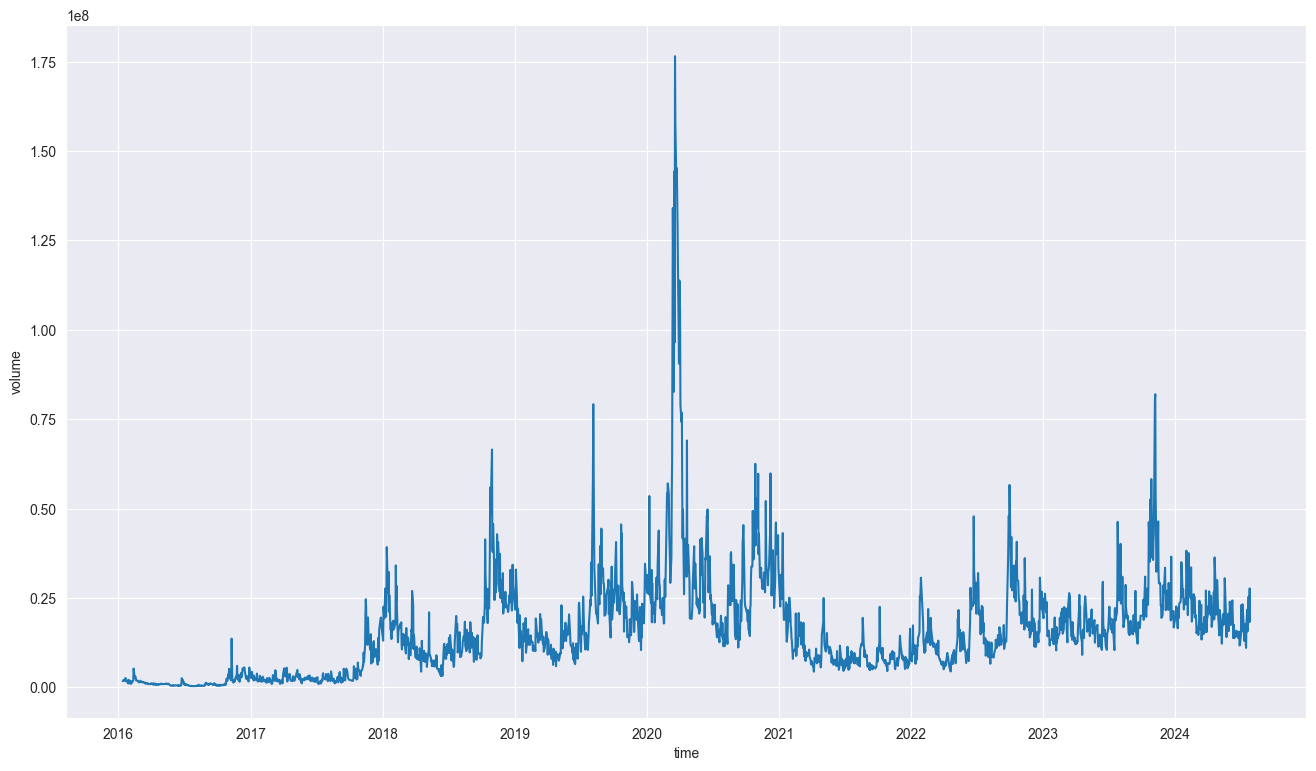

In [21]:
plt.figure(figsize=(16,9))
sns.lineplot(y=df3['VOLUME'], x=df3['DATEON'])
plt.xlabel('time')
plt.ylabel('volume')

Text(0, 0.5, 'price')

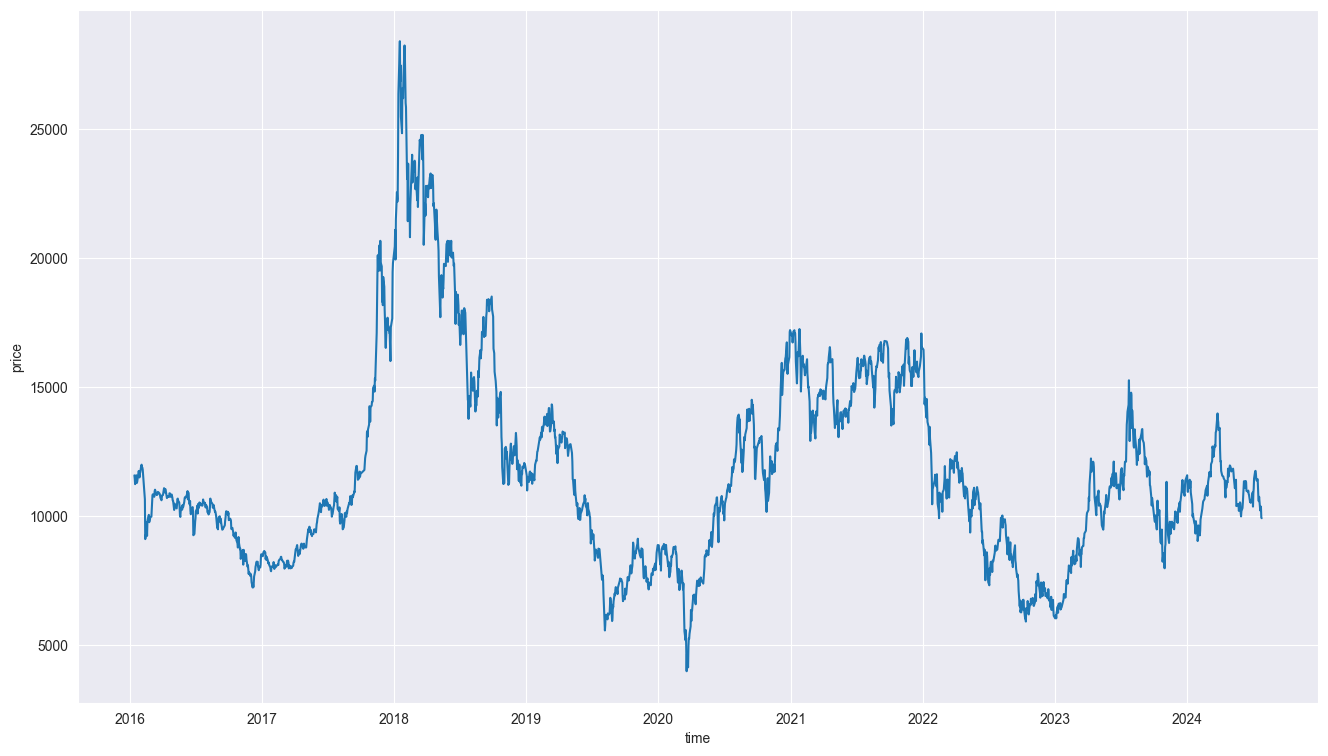

In [22]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df3['END_VALUE'], x=df3['DATEON'])
plt.xlabel('time')
plt.ylabel('price')

In [23]:
df3.columns

Index(['DATEON', 'TYPE_CODE_x', 'END_VALUE', 'DELTA', 'UPDOWN_PER', 'VOLUME',
       'COMP_BUY', 'FOR_BUY', 'FOR_CONT', 'FOR_PER', 'TYPE_CODE_y', 'PERSONAL',
       'FOREIGNER', 'COMPANY', 'FINANCE', 'INSURANCE', 'TOOSIN', 'BANK',
       'ETC_FIN', 'GOV_FUND', 'ETC_FUND', 'FOR_BUY_D14', 'FOR_BUY_D7',
       'COMP_BUY_D14', 'COMP_BUY_D7', 'YEAR'],
      dtype='object')

In [89]:
from sklearn.preprocessing import MinMaxScaler

df3.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['END_VALUE', 'DELTA', 'UPDOWN_PER', 'VOLUME',
              'COMP_BUY', 'FOR_BUY', 'FOR_CONT', 'FOR_PER', 'PERSONAL',
              'FOREIGNER', 'COMPANY', 'FINANCE', 'INSURANCE', 'TOOSIN', 'BANK',
              'ETC_FIN', 'GOV_FUND', 'ETC_FUND', 'FOR_BUY_D14', 'FOR_BUY_D7',
              'COMP_BUY_D14', 'COMP_BUY_D7']
df_scaled = scaler.fit_transform(df3[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled


,END_VALUE,DELTA,UPDOWN_PER,VOLUME,COMP_BUY,FOR_BUY,FOR_CONT,FOR_PER,PERSONAL,FOREIGNER,...,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,FOR_BUY_D14,FOR_BUY_D7,COMP_BUY_D14,COMP_BUY_D7
0,0.310874,0.641171,0.503753,0.008067,0.631937,0.507073,0.000000,0.000000,0.368042,0.540903,...,0.482093,0.705464,0.861503,0.785037,0.472220,0.828837,NaN,NaN,NaN,NaN
1,0.305755,0.519358,0.375938,0.008325,0.633654,0.507073,0.000000,0.000000,0.433417,0.477823,...,0.469427,0.633486,0.861918,0.783637,0.471956,0.837113,NaN,NaN,NaN,NaN
2,0.296949,0.502361,0.358278,0.009928,0.628959,0.507073,0.000000,0.000000,0.427476,0.508357,...,0.470412,0.487874,0.860448,0.777570,0.469006,0.836791,NaN,NaN,NaN,NaN
3,0.311079,0.608121,0.467550,0.008920,0.634236,0.507073,0.000000,0.000000,0.395126,0.483042,...,0.477378,0.710237,0.861694,0.786748,0.465440,0.827386,NaN,NaN,NaN,NaN
4,0.310055,0.538244,0.394923,0.009563,0.635601,0.507073,0.000000,0.000000,0.405360,0.496159,...,0.464783,0.735853,0.862238,0.787525,0.461389,0.826634,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.255171,0.442871,0.290949,0.142179,0.445721,0.408502,0.004598,0.003036,0.412584,0.534218,...,0.447615,0.520990,0.859841,0.782859,0.420313,0.801161,0.368002,0.387165,0.496905,0.480420
2096,0.257833,0.555241,0.413907,0.116647,0.615204,0.535360,0.031343,0.019429,0.366624,0.599644,...,0.453209,0.664362,0.856677,0.778504,0.467553,0.804708,0.359494,0.313314,0.490895,0.414487
2097,0.261315,0.559018,0.418102,0.101650,0.650893,0.530591,0.055118,0.033394,0.425154,0.498856,...,0.455988,0.626668,0.859425,0.780681,0.455930,0.813575,0.311464,0.301668,0.444234,0.408996
2098,0.243907,0.462701,0.309272,0.155203,0.478690,0.424791,0.003896,0.002429,0.505110,0.418105,...,0.449937,0.468004,0.856613,0.796702,0.452012,0.821582,0.333170,0.355516,0.431740,0.410841


In [90]:
TEST_SIZE = 200
WINDOW_SIZE = 20

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [91]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [106]:
from sklearn.model_selection import train_test_split

# feature_cols = ['DELTA', 'UPDOWN_PER', 'VOLUME',
#                 'COMP_BUY', 'FOR_BUY', 'FOR_CONT', 'FOR_PER', 'PERSONAL',
#                 'FOREIGNER', 'COMPANY', 'FINANCE', 'INSURANCE', 'TOOSIN', 'BANK',
#                 'ETC_FIN', 'GOV_FUND', 'ETC_FUND']
feature_cols = ['VOLUME',
                'COMP_BUY', 'FOR_BUY', 'FOR_CONT', 'FOR_PER', 'PERSONAL',
                'FOREIGNER', 'COMPANY', 'FINANCE', 'INSURANCE', 'TOOSIN', 'BANK',
                'ETC_FIN', 'GOV_FUND', 'ETC_FUND', 'FOR_BUY_D14', 'FOR_BUY_D7',
                'COMP_BUY_D14', 'COMP_BUY_D7']
label_cols = ['END_VALUE']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 30)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1496, 30, 19), (374, 30, 19))

In [107]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 19), (200, 1))

In [108]:
test_feature, test_label = make_dataset(test_feature, test_label, 30)
test_feature.shape, test_label.shape

((170, 30, 19), (170, 1))

In [109]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(16,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=True)
          )
# model.add(LSTM(units=16, activation='relu'))

model.add(Dense(1))

In [110]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
87/94 [==========================>...] - ETA: 0s - loss: nan
Epoch 1: val_loss did not improve from inf
94/94 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 2/200
83/94 [=========================>....] - ETA: 0s - loss: nan
Epoch 2: val_loss did not improve from inf
94/94 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/200
83/94 [=========================>....] - ETA: 0s - loss: nan
Epoch 3: val_loss did not improve from inf
94/94 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 4/200
82/94 [=========================>....] - ETA: 0s - loss: nan
Epoch 4: val_loss did not improve from inf
94/94 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 5/200
82/94 [=========================>....] - ETA: 0s - loss: nan
Epoch 5: val_loss did not improve from inf
94/94 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan


In [111]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

ValueError: Layer count mismatch when loading weights from file. Model expected 2 layers, found 3 saved layers.

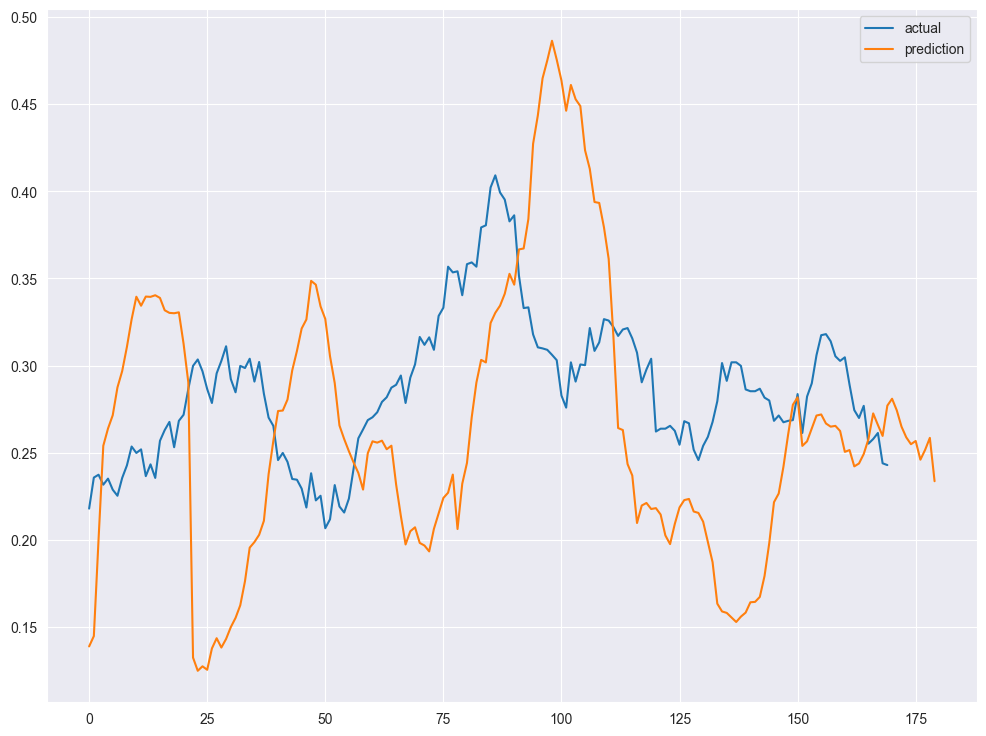

In [112]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()